In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.model_selection import train_test_split
import pylab as pl
import numpy as np

In [5]:
#Baca Data Iris
#Data Iris ada tiga kelas yaitu Setosa, Versicolor, dan Virginica yang disimpan dalam iris.target
#Data Iris memiliki 4 variabel yang disimpan dalam iris.data
iris = load_iris()

In [6]:
#Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [7]:
#Melakukan PCA agar bisa divisualiasikan dalam dua dimensi
pca = PCA(n_components = 2).fit(X_train)
pca_2d = pca.transform(X_train)

In [8]:
#Mendifinisikan model klasifikasi
svmClassifier = svm.LinearSVC(random_state = 111).fit(pca_2d, y_train)

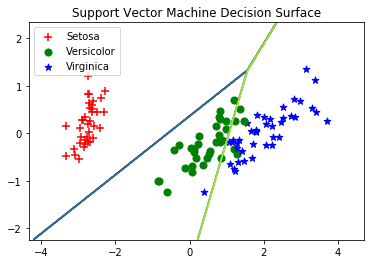

In [11]:
for i in range(0, pca_2d.shape[0]):
    #Tiap kelas ditandai dengan marker
    if y_train[i] == 0:
        #Marker + untuk Setosa
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', s=50,marker='+')
    elif y_train[i] == 1:
        #Marker o untuk Versicolo
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', s=50,marker='o')
    elif y_train[i] == 2:
        #Marker * untuk Virginica
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b', s=50,marker='*')

pl.legend([c1, c2, c3], ['Setosa', 'Versicolor',   'Virginica'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
#Menampilkan hasil prediksi SVM
Z = svmClassifier.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
#pl.axis('off')
pl.show()